11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.7224 - accuracy: 0.8007 - val_loss: 0.3656 - val_accuracy: 0.9018
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3840 - accuracy: 0.8903 - val_loss: 0.2924 - val_accuracy: 0.9198
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3231 - accuracy: 0.9082 - val_loss: 0.2538 - val_accuracy: 0.9281
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2859 - accuracy: 0.9180 - val_loss: 0.2304 - val_accuracy: 0.9340
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2601 - accuracy: 0.9255 - val_loss: 0.2097 - val_accuracy: 0.9420
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3378 - accuracy: 0.9006 - val_loss: 0.1669 - val_accuracy: 0.9518
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 

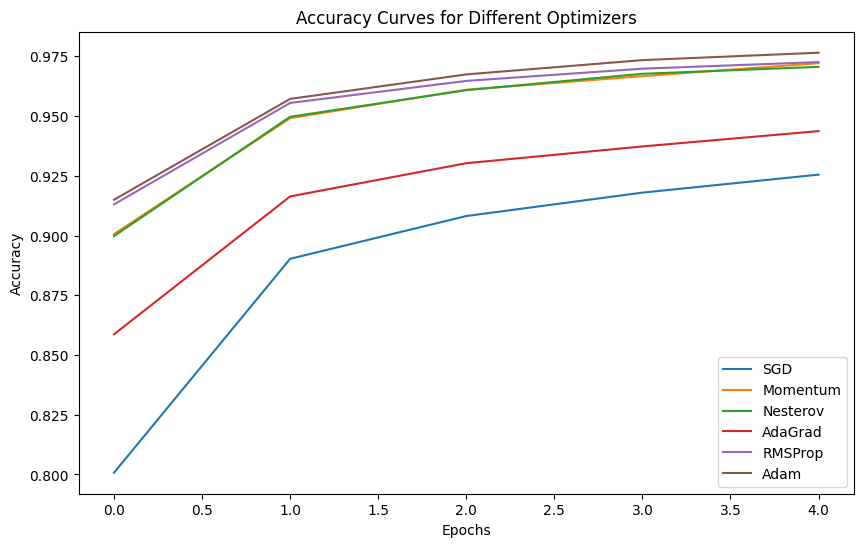

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define a function to create and compile a model
def create_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define different optimizers
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'Momentum': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Nesterov': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    'AdaGrad': tf.keras.optimizers.Adagrad(learning_rate=0.01),
    'RMSProp': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001)
}

# Initialize a dictionary to store accuracy history for each optimizer
accuracy_history = {}

# Train and evaluate models with different optimizers
num_epochs = 5

for optimizer_name, optimizer in optimizers.items():
    model = create_model(optimizer)
    history = model.fit(X_train, y_train, epochs=num_epochs, verbose=1, validation_data=(X_test, y_test))
    accuracy_history[optimizer_name] = history.history['accuracy']

# Plot accuracy curves for each optimizer
plt.figure(figsize=(10, 6))
for optimizer_name, accuracy_values in accuracy_history.items():
    plt.plot(accuracy_values, label=optimizer_name)

plt.title('Accuracy Curves for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
